In [1]:
# Extracao de informacoes de patentes
#
# Henrique Cursino Vieira

In [98]:
import re
import pandas as pd

import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud

In [3]:
# cada pagina lista 50 patentes, alterar a variavel n para obter o numero de
# patentes de interesse

p = 4

In [4]:
link = "https://www.freepatentsonline.com/result.html?p=1&sort=relevance&srch=top&query_txt=agronomy&patents_us=on"

In [5]:
page = requests.get(link)
soup = BeautifulSoup(page.content, 'html.parser')

In [6]:
print(soup.text)






var plstart = new Date();


    var _gaq = _gaq || [];
    _gaq.push(['_setAccount', 'UA-174791-1']);





FPO IP Research & Communities





    (adsbygoogle = window.adsbygoogle || []).push({
        google_ad_client: "ca-pub-1586334167197709",
        enable_page_level_ads: true
    });
















Login
                    
Sign up
                    









Search
                            





                                    Expert Search


                                    Quick Search








US Patents/Apps
                                



Other
                                












SEARCH


                            TOOLS & RESOURCES
                        






 






                Matches 1 - 50 out of 12916            

1 2  3  4  5  6  7  8  9  10  11  12  13  14  15  >  







    (adsbygoogle = window.adsbygoogle || []).push({});








                        Match
                    
 Document
Document Title
Score 



         

In [7]:
listing_table = soup.findAll("td")[2:202]

In [8]:
columns = ["Match", "Document", "Document_Title", "Score"]

In [9]:
#TODO: construcao da tabela
rows = []
for i in range(0, len(listing_table), 4):

#     print(i)
    match, document, document_title, score = listing_table[i:i+4]
    rows.append([match, document, document_title, score])    

In [15]:
listing_table[2]

<td valign="top" width="60%">
<a href="/y2019/0387659.html">SYSTEMS AND METHODS FOR ADJUSTING THE OUTPUT OF A FIELD MEASUREMENT SYSTEM TO CONFORM TO AGRONOMY MEASUREMENTS</a>
         
                            <br/>
                The present disclosure provides systems and methods for adjusting the output of a field measurement system to conform to agronomy measurements. In particular, the present subject matter is...    </td>

In [17]:
# lista de links

urls = []
for i in range(len(listing_table)):

    td = listing_table[i]
    a = td.findAll('a')
    
    if a:
        urls.append("https://www.freepatentsonline.com"+a[0].get('href'))

In [58]:
urls[0].split('/')

['https:', '', 'www.freepatentsonline.com', 'y2019', '0387659.html']

In [72]:
# extraindo informacoes dos documentos de patentes

tmp = dict()

for i, url in enumerate(urls):
    
    tmp[i] = []
    url_splited = url.split('/')
    
    if len(url_splited) == 4:
        idx = url_splited[3].replace('.html', '')
        
    if len(url_splited) == 5:
        idx = url_splited[4].replace('.html', '')

    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    tmp[i].append(['idx', idx])
    
    for row in soup.findAll("div", {"class":"disp_doc2"}):
        
        title_content = row.findAll("div", {"class":"disp_elm_title"})
        text_content = row.findAll("div", {"class":"disp_elm_text"})
        title = None
        text = None
        
        if title_content:
            title = title_content[0].text

            if text_content:
                text = text_content[0].text

            tmp[i].append([title, text])

In [61]:
len(tmp.keys())

50

In [84]:
tmp[0][2][1]

'\n            The present disclosure provides systems and methods for adjusting the output of a field measurement system to conform to agronomy measurements. In particular, the present subject matter is directed to a calibration process and system that uses a calibration model to convert field measurement data expressed according to an automatic system metric into agronomy data that is expressed according to an agronomy metric.         '

In [79]:
rows = []
for i in range(len(tmp)):
    
    row = [tmp[i][0][1], tmp[i][1][1], tmp[i][2][1]]
    rows.append(row)
    

In [89]:
data = pd.DataFrame(rows, columns = ['idx', 'title_raw', 'text_raw'])

In [90]:
def process_text(text = None):
    
    processed_text = re.sub('\n{1,}', '', text).strip().lower()    
    return processed_text
    

In [94]:
data['title'] = data['title_raw'].apply(lambda x : process_text(x))
data['text'] = data['text_raw'].apply(lambda x : process_text(x))
data['content'] = data['title'] + " " + data['text']
data.head(15)

,idx,title_raw,text_raw,title,text,content
0,0387659,\n\n SYSTEMS AND METHODS FO...,\n The present disclosure provides ...,systems and methods for adjusting the output o...,the present disclosure provides systems and me...,systems and methods for adjusting the output o...
1,10729058,\n\n Systems and methods fo...,\n The present disclosure provides ...,systems and methods for adjusting the output o...,the present disclosure provides systems and me...,systems and methods for adjusting the output o...
2,6745128,\n\n Methods and systems fo...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...
3,6549852,\n\n Methods and systems fo...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...
4,0018431,\n\n METHODS AND SYSTEMS FO...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...
5,0125877,\n\n Methods and systems fo...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...
6,0155623,\n\n Agronomy bonus system ...,\n A method and system for encourag...,agronomy bonus system and method,a method and system for encouraging farmers to...,agronomy bonus system and method a method and ...
7,10796261,\n\n Agricu...,\n United S...,agricultural enterprise management method and ...,united states patent 10796261,agricultural enterprise management method and ...
8,0322426,\n\n AGRICULTURAL ENTERPRIS...,\n A computer-implemented cloud-bas...,agricultural enterprise management method and ...,a computer-implemented cloud-based agricultura...,agricultural enterprise management method and ...
9,0191630,\n\n AUGMENTED-HUMAN FIELD ...,\n Systems and Methods for Augmente...,augmented-human field inspection tools for aut...,systems and methods for augmented-human field ...,augmented-human field inspection tools for aut...


In [97]:
data['content'].tolist()[10]

'augmented-human field inspection tools for automated phenotyping systems and agronomy tools systems and methods for augmented-human field inspection tools for automated phenotyping systems and agronomy tools. in one embodiment, a method for plant phenotyping, includes: acquiring a first set of observations about plants in a field by a trainer. the trainer carries a sensor configured to collect observations about the plant, and the first set of observations includes ground truth data. the method also includes processing the first set of observations about the plants by a trait extraction model to generate instructions for a trainee; and acquiring a second set of observations about the plants by a trainee while the trainee follows the instructions.'

In [106]:
# nuvem de palavras
text = ', '.join(list(data['content'].values))
wordcloud = WordCloud(background_color="white", 
                      max_words=5000, 
                      contour_width=3, 
                      contour_color='steelblue',
                      width=800, 
                      height=400)

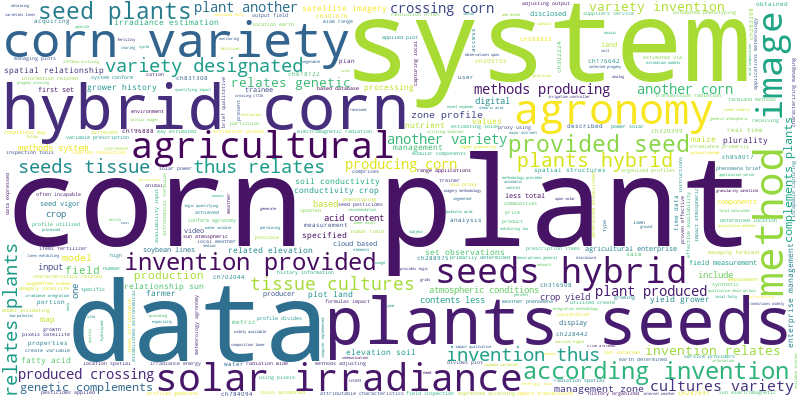

In [107]:
wordcloud.generate(text)
wordcloud.to_image()